In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

In [2]:
compdata = pd.read_csv("./data/sp500_companies.csv")
indexdata = pd.read_csv("./data/sp500_index.csv")
stockdata = pd.read_csv("./data/sp500_stocks.csv")

In [11]:
# plot candel stick funtion
def plot_candelstick(symbol):
    hold_df = stockdata.loc[stockdata.Symbol==symbol]
    fig = go.Figure(data=[go.Candlestick(x=hold_df['Date'],
                open=hold_df['Open'],
                high=hold_df['High'],
                low=hold_df['Low'],
                close=hold_df['Close'])])
    fig.update_layout(xaxis_rangeslider_visible=False)
    fig.show()

In [14]:
plot_candelstick("AAPL")

<Axes: xlabel='Volume', ylabel='Close'>

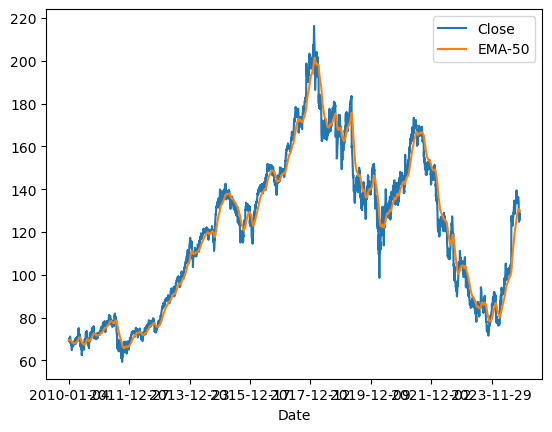

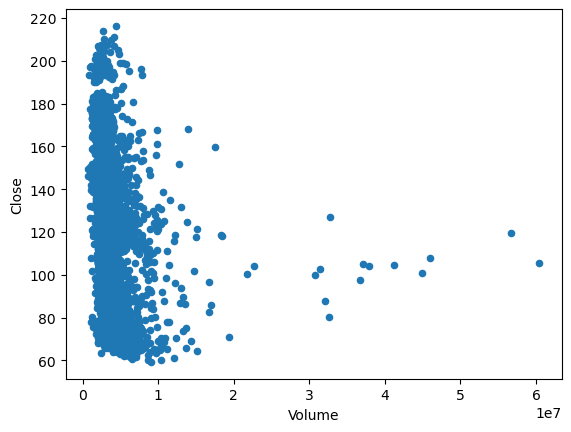

In [19]:
stockdata['EMA-50'] = stockdata['Close'].ewm(span=50, adjust=False).mean()
stockdata.loc[stockdata.Symbol=="MMM",].plot(x="Date", y=["Close", "EMA-50"])
stockdata.loc[stockdata.Symbol=="MMM",].plot.scatter(x="Volume", y="Close")